In [1]:
%matplotlib inline

In [2]:
# Raw data: jack height [mm], B_relative [uT].
down = [(59.5, -40.5),
        (70.5, -46.7),
        (80.5, -53.0),
        (89.5, -60.1),
        (99.0, -70.1),
        (110.0, -82.4),
        (119.0, -94.7),
        (129.5, -114.7),
        (139.5, -135.4),
        (150.0, -165.3),
        (160.0, -203.4),
        (170.0, -251.9),
        (179.5, -314.0)]

up = [(60.0, 40.5),
      (70.0, 46.3),
      (80.5, 54.3),
      (90.0, 61.3),
      (100.0, 70.7),
      (109.5, 82.0),
      (119.0, 96.1),
      (130.0, 115.3),
      (139.5, 137.0),
      (149.5, 165.3),
      (160.0, 203.7),
      (170.0, 253.3),
      (180.0, 315.4)]

down_jack_height_mm = np.array([p[0] for p in down])
down_B_relative_uT = np.array([p[1] for p in down])
up_jack_height_mm = np.array([p[0] for p in up])
up_B_relative_uT = np.array([p[1] for p in up])

probe_height_mm = 319.5 + 0.38  # The 0.38 is the distance from the probe end to the actual Hall sensor
block_thickness_mm = 25.5  # both blocks are the same thickness
magnet_half_thickness_mm = 1.5  # the magnets are about 3 mm thick
up_d_mm = probe_height_mm - (up_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)
down_d_mm = probe_height_mm - (down_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)

In [3]:
up_color = 'blue'
down_color = 'red'

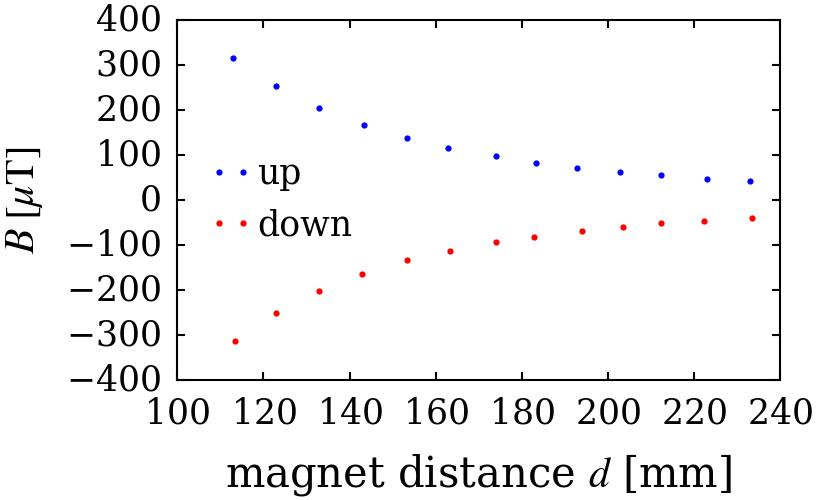

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel('magnet distance $d$ [mm]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_d_mm, up_B_relative_uT, '.', color=up_color, label='up')
ax.plot(down_d_mm, down_B_relative_uT, '.', color=down_color, label='down')
ax.legend(loc='center left', ncol=1);

In [5]:
up_slope, up_offset = np.polyfit(up_d_mm**-3, up_B_relative_uT, 1)

In [6]:
up_offset

8.6198539821769611

In [7]:
up_slope

450592601.5250684

In [8]:
down_slope, down_offset = np.polyfit(down_d_mm**-3, down_B_relative_uT, 1)

In [9]:
down_offset

-7.675890008999394

In [10]:
down_slope

-452796357.53515184

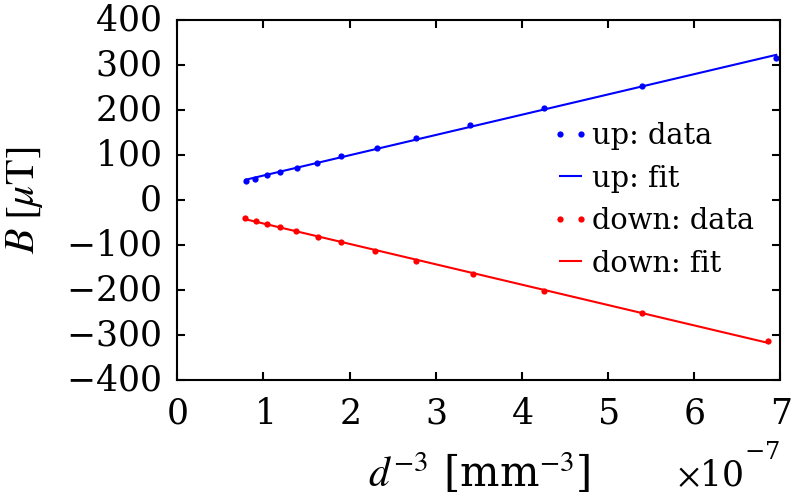

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('$d^{-3}$ [mm$^{-3}$]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_d_mm**-3, up_B_relative_uT, '.', color=up_color, label='up: data')
ax.plot(up_d_mm**-3, np.polyval((up_slope, up_offset), up_d_mm**-3), '-', color=up_color, label='up: fit')
ax.plot(down_d_mm**-3, down_B_relative_uT, '.', color=down_color, label='down: data')
ax.plot(down_d_mm**-3, np.polyval((down_slope, down_offset), down_d_mm**-3), '-', color=down_color, label='down: fit')
ax.legend(loc='center right', fontsize='xx-small');

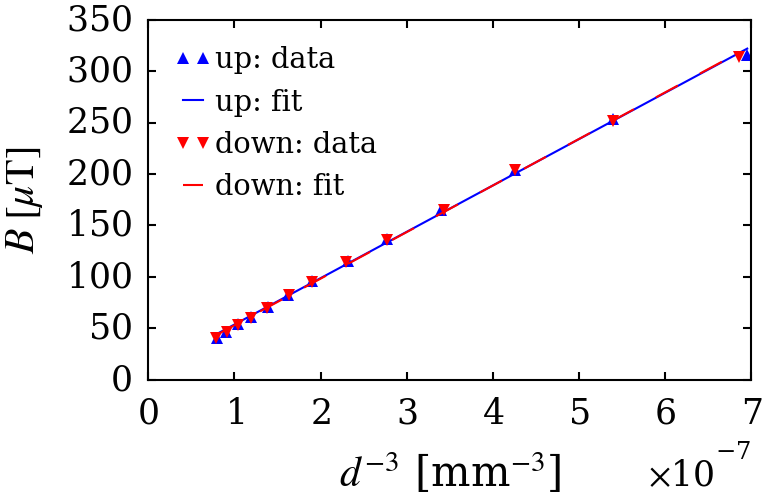

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel('$d^{-3}$ [mm$^{-3}$]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_d_mm**-3, up_B_relative_uT, '^', color=up_color, label='up: data')
ax.plot(up_d_mm**-3, np.polyval((up_slope, up_offset), up_d_mm**-3), '-', color=up_color, label='up: fit')
ax.plot(down_d_mm**-3, -down_B_relative_uT, 'v', color=down_color, label='down: data')
ax.plot(down_d_mm**-3, -np.polyval((down_slope, down_offset), down_d_mm**-3), '--', color=down_color, label='down: fit')
ax.legend(loc='upper left', fontsize='xx-small');

In [13]:
B = 10
d = (up_slope / (B - up_offset))**(1/3)
d

688.57778391033412

In [14]:
B = 10
d = (up_slope / (B - 0))**(1/3)
d

355.845396805718

In [15]:
np.unique(up_d_mm)

array([ 112.88,  122.88,  132.88,  143.38,  153.38,  162.88,  173.88,
        183.38,  192.88,  202.88,  212.38,  222.88,  232.88])